In [1]:
FIG_WIDTH = 12
FIG_HEIGHT = 8
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re


In [2]:
data_f_name='slim_data_18880.pkl'
# data_f_name='data_21025.pkl'
with open(f'simulations/dataframe_data/{data_f_name}','rb') as f:
	df= pd.read_pickle(f)
df['full_tag'] = df['model']
model_match=re.compile('((?:(?!factor).)+)_(?:(?:factor_|DC_|-?(?:[0-9]+(?:(?:\-|\.)[0-9]+)?)).)*')
def convert_model_type(x):
	m = model_match.match(x)
	out= m.group(1)
	if 'noNMDA' not in out:
		out +='_noNMDA' if 'noNMDA' in x else ''
	if 'DC' not in out:
		out +='_DC' if 'DC' in x else ''
	out = re.sub('[0-9]+','',out)
	out = re.sub('_{2,}','_',out)
	return out
df['model']= df['full_tag'].apply(convert_model_type)
# factor_match = re.compile('.*_factor_([0-9](?:-[0-9])?)_.*')
factor_match = re.compile('^.*(?!DC)_([0-9](?:(?:\-|\.)[0-9]+)?)[^0-9\s]{0,3}.*$')
# factor_match = re.compile('^.*(?!DC)_([0-9](?:(?:\-|\.)[0-9]+)?)[^0-9\s]{0,3}.*$')
factor_match_with_inh = re.compile('^.*(?!inh)_factor_([0-9](?:(?:\-|\.)[0-9]+)?)[^0-9\s]{0,3}.*$')
# factor_match = re.compile('^.*((?!inh)_factor)_([0-9](?:(?:\-|\.)[0-9]+)?)[^0-9\s]{0,3}.*$')
inh_factor_match = re.compile('^.*inh_factor_([0-9](?:(?:\-|\.)[0-9]+)?)[^0-9\s]{1,3}.*$')
def convert_factor(x):
	if 'inh' in x:
		m = factor_match_with_inh.match(x)
	else:
		m = factor_match.match(x)
	data =  m.group(1).replace('-','.')
	return float(data)
def convert_inh_factor(x):
	if 'inh' in x:
		m = inh_factor_match.match(x)
		data =  m.group(1).replace('-','.')
	else:
		data=1.
	return data
df['factor'] = df['full_tag'].apply(convert_factor)

dc_match = re.compile('^.*DC_-?([0-9]{2,3})[^0-9\s]*$')
def convert_dc(x):
	if 'DC' not in x:
		return -70
	m=dc_match.match(x)
	if m is None:
		return np.NAN
	return -abs(float(m.group(1)))
df['dc'] = df['full_tag'].apply(convert_dc)
df['inh factor'] = df['full_tag'].apply(convert_inh_factor)
# df = df[df['dc']!=-85]
df['dc indicator']=df['full_tag'].apply(lambda x: 'DC' in x)
df['group']=df['model']+"_"+df['factor'].apply(str)+"_"+df['inh factor'].apply(str)
df


,model,simulation,soma_average_voltage,rate,full_tag,factor,dc,inh factor,dc indicator,group
0,Rat_Lb_PC_Hay_DC,ID_14_159701_Rat_L5b_PC_2_Hay_factor_0-15_DC_-70,-65.671916,5.366667,Rat_L5b_PC_2_Hay_factor_0-15_DC_-70,0.15,-70.0,1.0,True,Rat_Lb_PC_Hay_DC_0.15_1.0
1,Rat_Lb_PC_Hay_DC,ID_28_582569_Rat_L5b_PC_2_Hay_factor_0-15_DC_-70,-61.847786,7.183333,Rat_L5b_PC_2_Hay_factor_0-15_DC_-70,0.15,-70.0,1.0,True,Rat_Lb_PC_Hay_DC_0.15_1.0
2,Rat_Lb_PC_Hay_DC,ID_50_664568_Rat_L5b_PC_2_Hay_factor_0-15_DC_-70,-65.761029,13.300000,Rat_L5b_PC_2_Hay_factor_0-15_DC_-70,0.15,-70.0,1.0,True,Rat_Lb_PC_Hay_DC_0.15_1.0
3,Rat_Lb_PC_Hay_DC,ID_79_430323_Rat_L5b_PC_2_Hay_factor_0-15_DC_-70,-65.407703,16.616667,Rat_L5b_PC_2_Hay_factor_0-15_DC_-70,0.15,-70.0,1.0,True,Rat_Lb_PC_Hay_DC_0.15_1.0
4,Rat_Lb_PC_Hay_DC,ID_26_190369_Rat_L5b_PC_2_Hay_factor_0-15_DC_-70,-61.178498,9.200000,Rat_L5b_PC_2_Hay_factor_0-15_DC_-70,0.15,-70.0,1.0,True,Rat_Lb_PC_Hay_DC_0.15_1.0
...,...,...,...,...,...,...,...,...,...,...
721,Rat_Lb_PC_Hay_noNMDA_DC,ID_87_318268_Rat_L5b_PC_2_Hay_noNMDA_factor_10...,-70.211491,4.583333,Rat_L5b_PC_2_Hay_noNMDA_factor_10_inh_factor_0...,0.50,-70.0,0.5,True,Rat_Lb_PC_Hay_noNMDA_DC_0.5_0.5
722,Rat_Lb_PC_Hay_noNMDA_DC,ID_14_159701_Rat_L5b_PC_2_Hay_noNMDA_factor_10...,-65.914472,5.416667,Rat_L5b_PC_2_Hay_noNMDA_factor_10_inh_factor_0...,0.50,-70.0,0.5,True,Rat_Lb_PC_Hay_noNMDA_DC_0.5_0.5
723,Rat_Lb_PC_Hay_noNMDA_DC,ID_50_664568_Rat_L5b_PC_2_Hay_noNMDA_factor_10...,-62.281636,3.966667,Rat_L5b_PC_2_Hay_noNMDA_factor_10_inh_factor_0...,0.50,-70.0,0.5,True,Rat_Lb_PC_Hay_noNMDA_DC_0.5_0.5
724,Rat_Lb_PC_Hay_noNMDA_DC,ID_26_190369_Rat_L5b_PC_2_Hay_noNMDA_factor_10...,-64.957244,0.416667,Rat_L5b_PC_2_Hay_noNMDA_factor_10_inh_factor_0...,0.50,-70.0,0.5,True,Rat_Lb_PC_Hay_noNMDA_DC_0.5_0.5


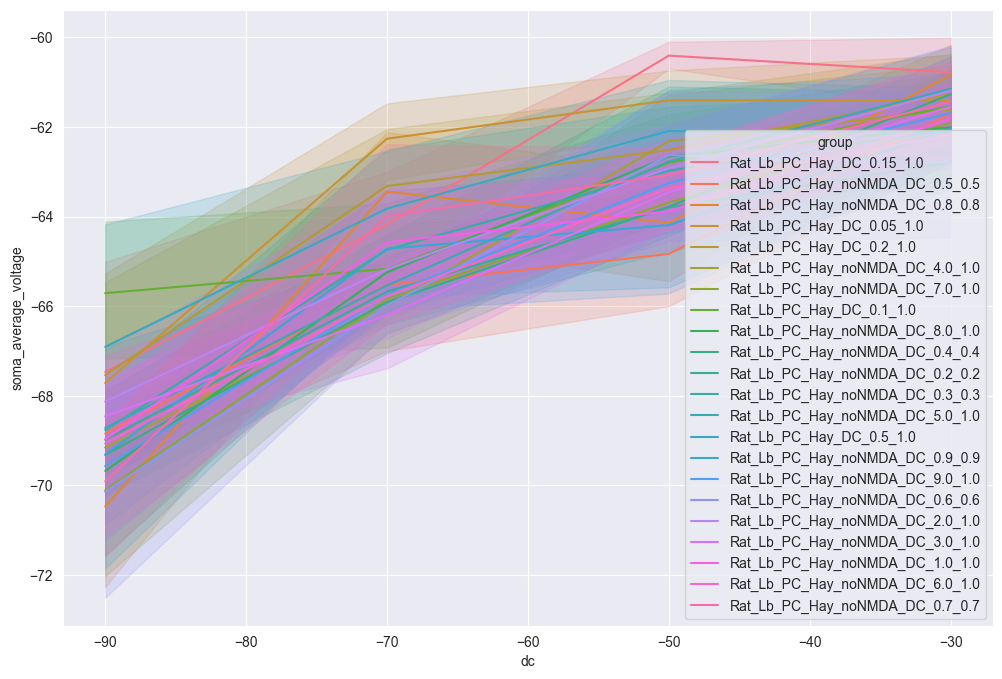

In [3]:
fig,ax = plt.subplots(1)
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGHT)
sns.lineplot(df[df['dc indicator']],x='dc',y='soma_average_voltage',hue='group',ax=ax)
plt.show()

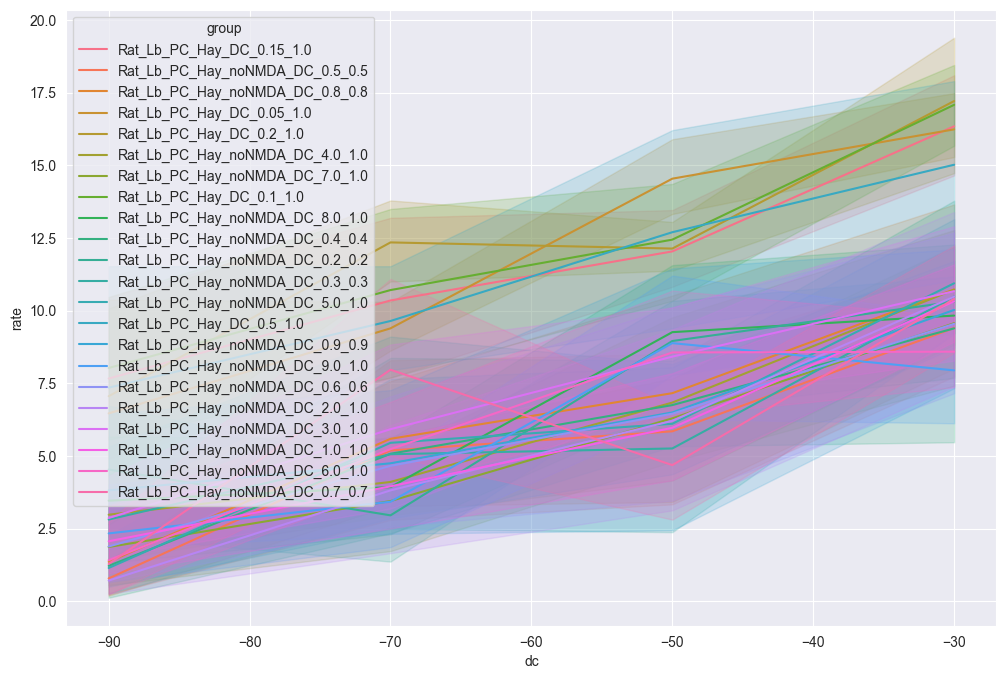

In [4]:
fig,ax = plt.subplots(1)
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGHT)


sns.lineplot(df,x='dc',y='rate',hue='group',ax=ax)
plt.show()


In [5]:
df[(df['dc']<=-80) & (df['factor']==10.)]

,model,simulation,soma_average_voltage,rate,full_tag,factor,dc,inh factor,dc indicator,group


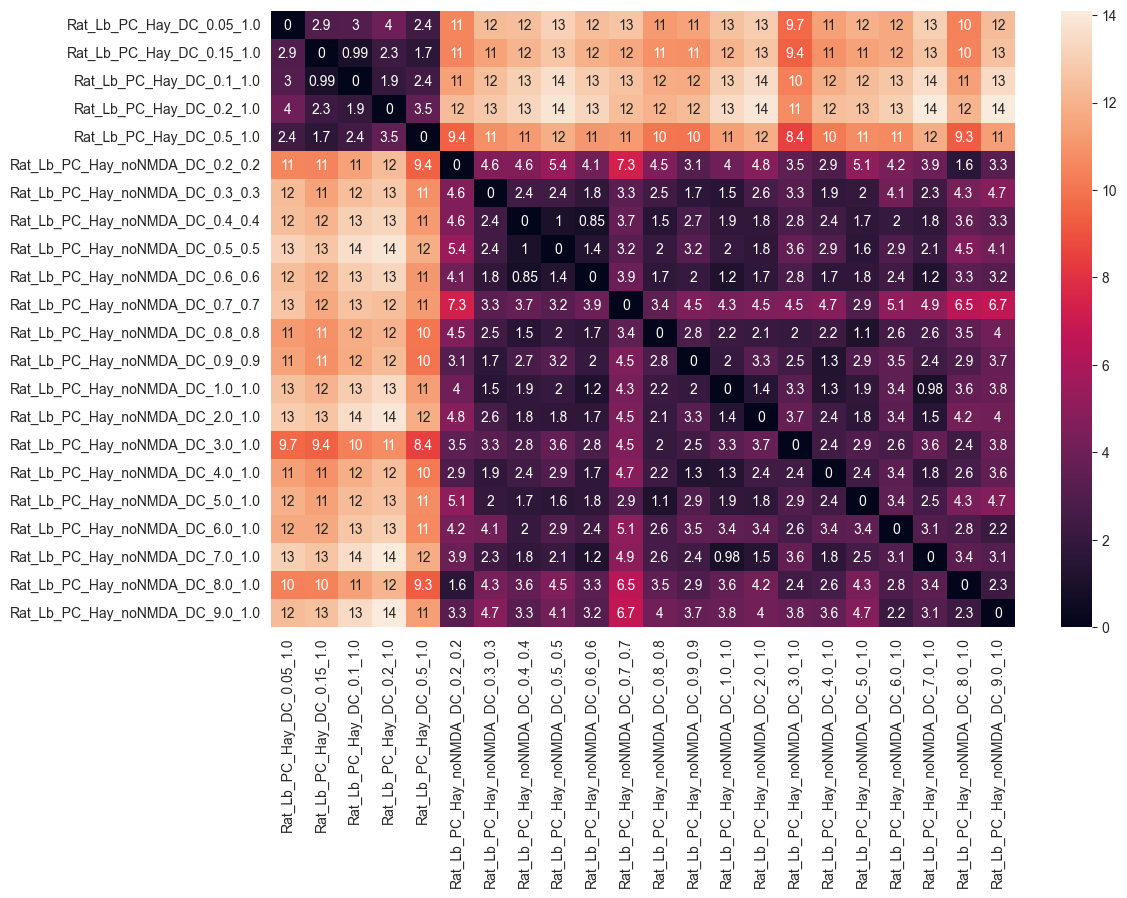

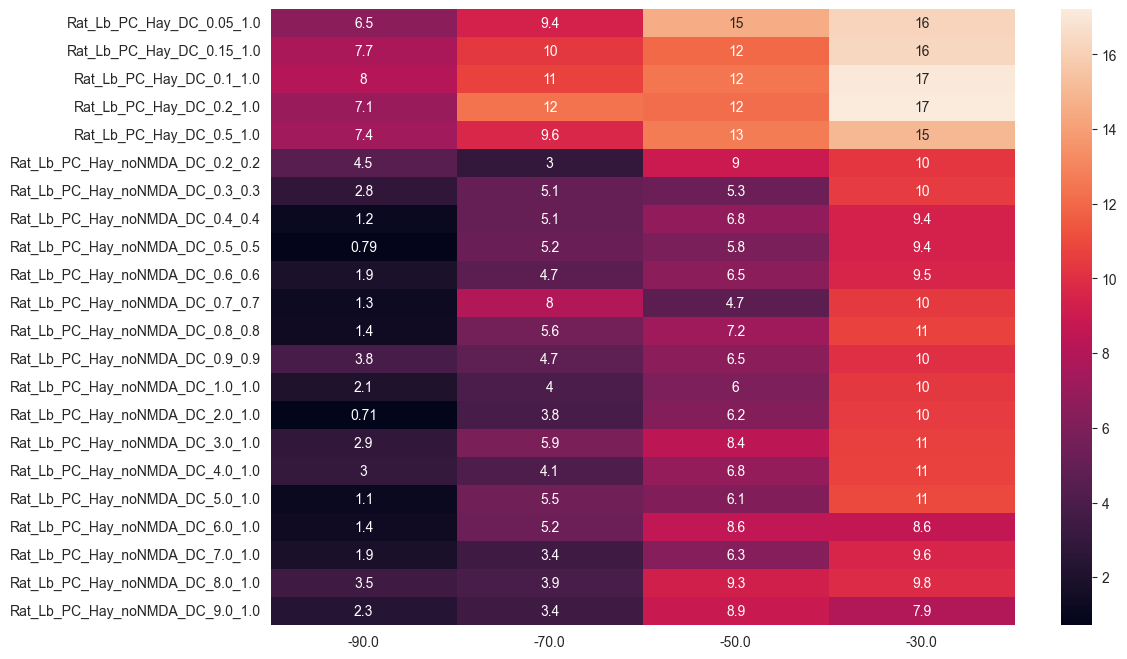

In [6]:
dist_mat=[]
vectors=[]
labels=[]
dc_ord=[]
dc_flag=True

for i in sorted(df[df['dc indicator']]['group'].unique(),key = lambda x:('noNMDA' in x,x)):
	labels.append(i)
	vectors.append([])

	for dc in sorted(df[df['group']==i]['dc'].unique()):
		vectors[-1].append(df[(df['dc']==dc)&(df['group']==i)]['rate'].mean())
		if dc_flag:
			dc_ord.append(dc)
	dc_flag=False
vectors = np.array(vectors)
from scipy.spatial import distance_matrix
fig,ax = plt.subplots(1)
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGHT)
distance_mat = pd.DataFrame(distance_matrix(vectors, vectors), index=labels, columns=labels)
sns.heatmap(distance_mat, annot=True,ax=ax)
plt.show()
fig,ax = plt.subplots(1)
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGHT)
distance_mat = pd.DataFrame(vectors, index=labels, columns=dc_ord)
sns.heatmap(distance_mat, annot=True,ax=ax)

plt.show()


In [7]:
data_arr=[]
model_arr=[]
for i in pd.unique(df[df['dc']==-70]['group']):
	if 'current' in i:
		continue
	data_arr.append(df[df['group']==i]['rate'].mean())
	model_arr.append(i)
rate_df=  pd.DataFrame({'model':model_arr,'rate':data_arr})
rate_df

,model,rate
0,Rat_Lb_PC_Hay_DC_0.15_1.0,11.388710
1,Rat_Lb_PC_Hay_noNMDA_DC_0.8_0.8,6.328000
2,Rat_Lb_PC_Hay_DC_0.05_1.0,11.351042
3,Rat_Lb_PC_Hay_DC_0.1_1.0,11.954902
4,Rat_Lb_PC_Hay_noNMDA_DC_8.0_1.0,6.435417
5,Rat_Lb_PC_Hay_noNMDA_DC_0.4_0.4,5.568590
6,Rat_Lb_PC_Hay_noNMDA_DC_0.3_0.3,6.329630
7,Rat_Lb_PC_Hay_noNMDA_DC_0.2_0.2,6.688542
8,Rat_Lb_PC_Hay_DC_0.2_1.0,12.175980
9,Rat_Lb_PC_Hay_noNMDA_DC_0.6_0.6,5.483854
